In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/home/dslab/Downloads/std1.csv")

In [4]:
df

,Hours,Scores
0,3,1.0
1,4,3.0
2,1,5.0
3,2,4.0
4,4,2.0
5,6,3.2
6,3,2.6


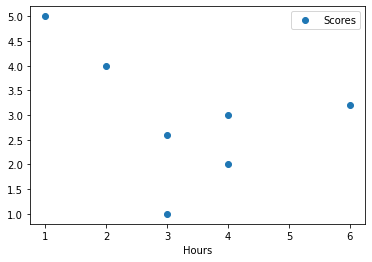

In [5]:
df.plot(x="Hours", y="Scores", style="o")
plt.show()


In [6]:
x_mean = df["Hours"].mean()
y_mean = df["Scores"].mean()
print(x_mean, y_mean)

3.2857142857142856 2.9714285714285715


In [7]:

df["x"] = df["Hours"] - x_mean
df["y"] = df["Scores"] - y_mean
df["x*y"] = df["x"] * df["y"]
df["x^2"] = df["x"]**2
df["y^2"] = df["y"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2
0,3,1.0,-0.285714,-1.971429,0.563265,0.081633,3.886531
1,4,3.0,0.714286,0.028571,0.020408,0.510204,0.000816
2,1,5.0,-2.285714,2.028571,-4.636735,5.224490,4.115102
3,2,4.0,-1.285714,1.028571,-1.322449,1.653061,1.057959
4,4,2.0,0.714286,-0.971429,-0.693878,0.510204,0.943673
5,6,3.2,2.714286,0.228571,0.620408,7.367347,0.052245
6,3,2.6,-0.285714,-0.371429,0.106122,0.081633,0.137959


In [8]:
summation_x_y = df["x*y"].sum()
summation_x_squared = df["x^2"].sum()
summation_y_squared = df["y^2"].sum()
print(summation_x_y, summation_x_squared, summation_y_squared)

-5.3428571428571425 15.428571428571429 10.194285714285716


In [9]:
correlation = summation_x_y / (summation_x_squared * summation_y_squared)**0.5
correlation

-0.4260222716215921

In [10]:
def getMean(numbers):
    if len(numbers) == 0:
        return None
    else:
        current_sum = 0
        for i in numbers:
            current_sum += i
            current_avg = current_sum/len(numbers)
        return current_avg

In [11]:
def getStandardDeviation(numbers):
    if len(numbers) == 0:
        return 0
    else:
        mean = getMean(numbers)
        std_deviation = 0
        for i in numbers:
            std_deviation += (i - mean)**2
        return (std_deviation/len(numbers))**0.5

In [12]:
std_deviation_x = getStandardDeviation(df["x"].tolist())
std_deviation_y = getStandardDeviation(df["y"].tolist())
print(std_deviation_x, std_deviation_y)

1.4846149779161806 1.206783547539593


In [13]:
m = correlation * (std_deviation_y / std_deviation_x)
m

-0.3462962962962962

In [14]:
c = df["Scores"].mean() - m * df["Hours"].mean()
c

4.109259259259259

In [15]:
df["y_prediction"] = m * df["Hours"] + c
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction
0,3,1.0,-0.285714,-1.971429,0.563265,0.081633,3.886531,3.070370
1,4,3.0,0.714286,0.028571,0.020408,0.510204,0.000816,2.724074
2,1,5.0,-2.285714,2.028571,-4.636735,5.224490,4.115102,3.762963
3,2,4.0,-1.285714,1.028571,-1.322449,1.653061,1.057959,3.416667
4,4,2.0,0.714286,-0.971429,-0.693878,0.510204,0.943673,2.724074
5,6,3.2,2.714286,0.228571,0.620408,7.367347,0.052245,2.031481
6,3,2.6,-0.285714,-0.371429,0.106122,0.081633,0.137959,3.070370


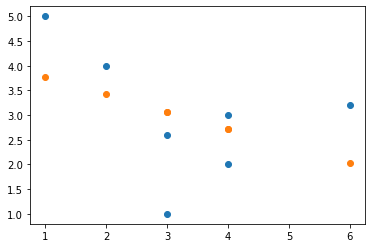

In [16]:
plot1 = plt.scatter(df["Hours"], df["Scores"])
plot2 = plt.scatter(df["Hours"], df["y_prediction"])
plt.show()

In [17]:
df["cost"]=df["Scores"]-df["y_prediction"]
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,cost
0,3,1.0,-0.285714,-1.971429,0.563265,0.081633,3.886531,3.070370,-2.070370
1,4,3.0,0.714286,0.028571,0.020408,0.510204,0.000816,2.724074,0.275926
2,1,5.0,-2.285714,2.028571,-4.636735,5.224490,4.115102,3.762963,1.237037
3,2,4.0,-1.285714,1.028571,-1.322449,1.653061,1.057959,3.416667,0.583333
4,4,2.0,0.714286,-0.971429,-0.693878,0.510204,0.943673,2.724074,-0.724074
5,6,3.2,2.714286,0.228571,0.620408,7.367347,0.052245,2.031481,1.168519
6,3,2.6,-0.285714,-0.371429,0.106122,0.081633,0.137959,3.070370,-0.470370


In [18]:
cost=(df["cost"].sum())
cost

-8.881784197001252e-16

In [19]:
df["SSE"]=df["cost"]**2
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,cost,SSE
0,3,1.0,-0.285714,-1.971429,0.563265,0.081633,3.886531,3.070370,-2.070370,4.286433
1,4,3.0,0.714286,0.028571,0.020408,0.510204,0.000816,2.724074,0.275926,0.076135
2,1,5.0,-2.285714,2.028571,-4.636735,5.224490,4.115102,3.762963,1.237037,1.530261
3,2,4.0,-1.285714,1.028571,-1.322449,1.653061,1.057959,3.416667,0.583333,0.340278
4,4,2.0,0.714286,-0.971429,-0.693878,0.510204,0.943673,2.724074,-0.724074,0.524283
5,6,3.2,2.714286,0.228571,0.620408,7.367347,0.052245,2.031481,1.168519,1.365436
6,3,2.6,-0.285714,-0.371429,0.106122,0.081633,0.137959,3.070370,-0.470370,0.221248


In [24]:
sse=df["SSE"].sum()
sse

8.344074074074074

In [25]:
#sst-sse=ssr
df["Scores"].mean()

2.9714285714285715

In [27]:
df["SST"]=(df["Scores"]-df["Scores"].mean())**2
df

,Hours,Scores,x,y,x*y,x^2,y^2,y_prediction,cost,SSE,SST
0,3,1.0,-0.285714,-1.971429,0.563265,0.081633,3.886531,3.070370,-2.070370,4.286433,3.886531
1,4,3.0,0.714286,0.028571,0.020408,0.510204,0.000816,2.724074,0.275926,0.076135,0.000816
2,1,5.0,-2.285714,2.028571,-4.636735,5.224490,4.115102,3.762963,1.237037,1.530261,4.115102
3,2,4.0,-1.285714,1.028571,-1.322449,1.653061,1.057959,3.416667,0.583333,0.340278,1.057959
4,4,2.0,0.714286,-0.971429,-0.693878,0.510204,0.943673,2.724074,-0.724074,0.524283,0.943673
5,6,3.2,2.714286,0.228571,0.620408,7.367347,0.052245,2.031481,1.168519,1.365436,0.052245
6,3,2.6,-0.285714,-0.371429,0.106122,0.081633,0.137959,3.070370,-0.470370,0.221248,0.137959


In [28]:
sst=df["SST"].sum()
sst

10.194285714285716

In [29]:
ssr=sst-sse
ssr


1.8502116402116418